In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
df = pd.read_csv("crime_report_boston.csv")

In [5]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192068249,2647,Other,THREATS TO DO BODILY HARM,B2,280,NaN,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,C11,356,NaN,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,Fraud,FRAUD - IMPERSONATION,A1,172,NaN,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,Fraud,FRAUD - IMPERSONATION,E18,525,NaN,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,159,NaN,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [6]:
df.OFFENSE_CODE_GROUP.value_counts().iloc[:10]

Motor Vehicle Accident Response    5827
Larceny                            5030
Other                              3383
Drug Violation                     3330
Medical Assistance                 3146
Vandalism                          2702
Simple Assault                     2620
Investigate Person                 2512
Larceny From Motor Vehicle         2114
Towed                              1560
Name: OFFENSE_CODE_GROUP, dtype: int64

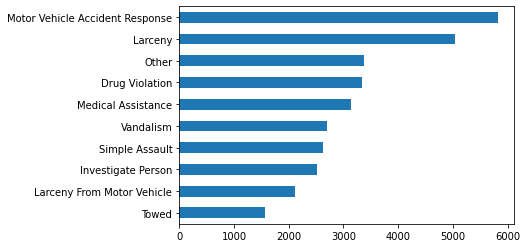

In [7]:
df.OFFENSE_CODE_GROUP.value_counts().iloc[:10].sort_values().plot(kind = "barh")

In [8]:
Larceny = df[df.OFFENSE_CODE_GROUP.str.contains("Larceny")]
Larceny.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
14,I182052842,619,Larceny,LARCENY ALL OTHERS,D4,149,NaN,2015-12-20 14:00:00,2015,12,Sunday,14,Part One,DARTMOUTH ST,42.347671,-71.076207,"(42.34767067, -71.07620742)"
29,I172095919,615,Larceny From Motor Vehicle,LARCENY THEFT OF MV PARTS & ACCESSORIES,C11,366,NaN,2015-10-01 08:00:00,2015,10,Thursday,8,Part One,EDWIN ST,42.289433,-71.060522,"(42.28943324, -71.06052190)"
36,I172076361,619,Larceny,LARCENY ALL OTHERS,E5,723,NaN,2015-09-01 00:00:00,2015,9,Tuesday,0,Part One,VFW PKWY,42.268975,-71.171831,"(42.26897529, -71.17183138)"
52,I172038128,619,Larceny,LARCENY ALL OTHERS,A1,116,NaN,2015-07-30 00:00:00,2015,7,Thursday,0,Part One,LINCOLN ST,42.351318,-71.058384,"(42.35131763, -71.05838367)"
54,I172028486,619,Larceny,LARCENY ALL OTHERS,A1,112,NaN,2015-11-01 14:57:00,2015,11,Sunday,14,Part One,CHAUNCY ST,42.352851,-71.060964,"(42.35285118, -71.06096412)"


In [75]:
Larceny.groupby("MONTH").size().sort_values(ascending = False)

MONTH
7     1156
10    1133
8     1121
12    1060
9     1038
11    1021
6      615
dtype: int64

In [11]:
Larceny.groupby("STREET").size().sort_values(ascending = False)

STREET
WASHINGTON ST       449
BOYLSTON ST         438
HUNTINGTON AVE      187
NEWBURY ST          153
COMMONWEALTH AVE    141
                   ... 
HILBURN ST            1
HILLOCK ST            1
HOFFMAN ST            1
HOLBROOK ST           1
ZEIGLER ST            1
Length: 1421, dtype: int64

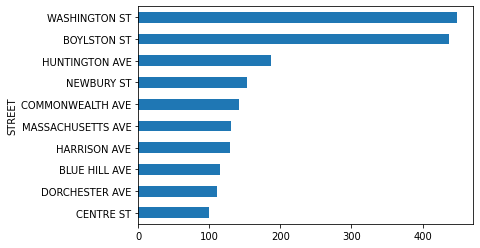

In [12]:
Larceny.groupby("STREET").size().sort_values(ascending = False).head(10).sort_values().plot(kind = "barh")

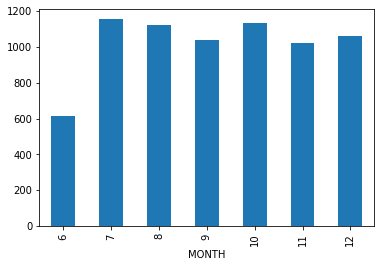

In [13]:
Larceny.groupby("MONTH").size().plot(kind = "bar")

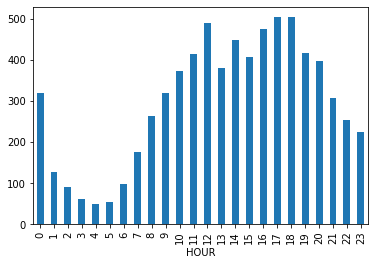

In [15]:
Larceny.groupby("HOUR").size().plot(kind = "bar")

In [39]:
Larceny[Larceny.YEAR == 2015].groupby(["MONTH", "HOUR"]).size()

MONTH  HOUR
6      0       34
       1        7
       2       11
       3        8
       4        6
               ..
12     19      74
       20      62
       21      58
       22      44
       23      31
Length: 168, dtype: int64

In [40]:
Larceny[Larceny.YEAR == 2015].groupby(["MONTH", "HOUR"]).size().unstack(0)

MONTH,6,7,8,9,10,11,12
HOUR,,,,,,,
0,34,59,57,47,42,43,36
1,7,21,28,23,23,11,14
2,11,14,20,12,13,7,14
3,8,10,9,6,9,10,9
4,6,10,8,2,4,8,10
5,2,8,11,11,14,4,3
6,7,21,13,12,20,11,13
7,9,33,27,21,42,21,23
8,28,43,44,32,39,44,34


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f25ebd95e50>,
      dtype=object)

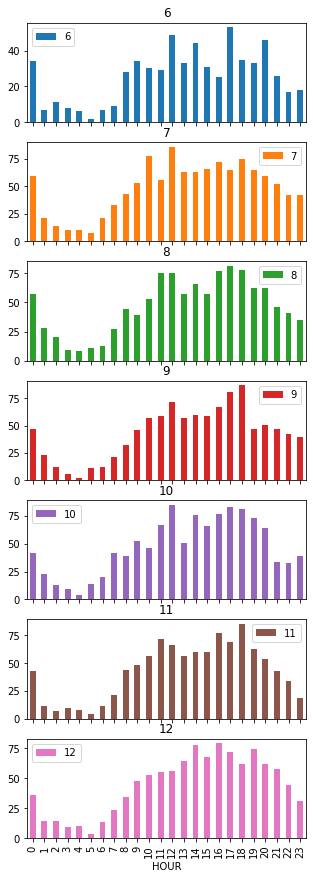

In [76]:
Larceny[Larceny.YEAR == 2015].groupby(["MONTH","HOUR"]).size().unstack(0).plot(subplots = True,kind = "bar",figsize = (5,15))